<a href="https://colab.research.google.com/github/varskann/my_projects/blob/master/monte_carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monte Carlo Simulation
It is used for risk analysis based on the random numbers / probabilities:

To Read: 
- https://medium.com/towards-artificial-intelligence/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8#6185 (*Code from here)
- https://pbpython.com/monte-carlo.html

In [17]:
!pip3 install --quiet ColabTurtle
!pip install --quiet ColabTurtle


In [37]:
%matplotlib inline

import math
import random
import ColabTurtle
from ColabTurtle.Turtle import *
import numpy as np
import matplotlib.pyplot as plt

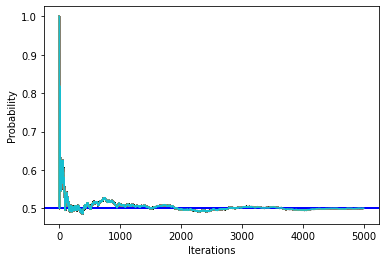

In [4]:
## Coin Flip Simulation

def coin_flip():
  return random.randint(0, 1)

flip_out =[]
def monte_carlo_simulation(n=1000):
  results = 0
  for i in range(n):
    flip_result = coin_flip()
    results += flip_result
    prob_value = float(results) / (i+1)

    flip_out.append(prob_value)

    plt.axhline(y=0.5, color='b', linestyle='-')
    plt.xlabel("Iterations")
    plt.ylabel("Probability")
    plt.plot(flip_out)


monte_carlo_simulation(5000)

In [72]:
## Estimating PI using circle and square
from math import pi
t = ColabTurtle.Turtle
t.initializeTurtle(initial_speed=10)
t.hideturtle()
t.width(1)
def tcircle(radius):

    #function could be summarized into:
    #regular_polygon(int((2 * pi * radius)/9)),9)

    #explained step by step:
    """draws a regular polygon of n sides
    that is supposed to appear like a circle.
    n is set to 9 for fast drawing time.
    it calculates rounded side length from n and radius"""
    #circumference (c)= 2*pi*radius
    c = 2 * pi * radius


    #n = amount of lines or corners, it defines the accuracy of the circle
    n = 200 # lower number to decrease drawing time (can be any float or int)

    #circumference (c) = ca.  l * n
    #l = length of individual lines 
    l = int(float(c) / float(n))

    regular_polygon(int(l),n)

def regular_polygon(length, n):
  print(length, n)
  for _ in range(n):
      t.forward(length)
      t.left(360 / n)

def track_points(s = 200):
  ## Draw the square
  t.penup()
  t.goto(400 + s//2, 250 + s//2)
  t.pendown()
  t.forward(s) 
  t.left(90)
  t.forward(s) 
  t.left(90) 
  t.forward(s) 
  t.left(90) 
  t.forward(s) 
  t.left(90) 


  ## Draw circle 
  t.penup()
  t.goto(400 + s//2 - 2, 250)

  t.pendown()
  tcircle(120)

track_points()

(400, 250)
['DEFAULT_BACKGROUND_COLOR', 'DEFAULT_IS_PEN_DOWN', 'DEFAULT_PEN_COLOR', 'DEFAULT_PEN_WIDTH', 'DEFAULT_SPEED', 'DEFAULT_SVG_LINES_STRING', 'DEFAULT_TURTLE_DEGREE', 'DEFAULT_TURTLE_VISIBILITY', 'DEFAULT_WINDOW_SIZE', 'HTML', 'SPEED_TO_SEC_MAP', 'SVG_TEMPLATE', 'TURTLE_SVG_TEMPLATE', 'VALID_COLORS', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_generateTurtleSvgDrawing', '_genereateSvgDrawing', '_moveToNewPosition', '_speedToSec', '_updateDrawing', 'background_color', 'backward', 'bgcolor', 'color', 'display', 'drawing_window', 'forward', 'goto', 'hideturtle', 'initializeTurtle', 'is_pen_down', 'is_turtle_visible', 'left', 'math', 'pen_color', 'pen_width', 'pendown', 'penup', 'right', 'setx', 'sety', 'showturtle', 'speed', 'svg_lines_string', 'time', 'timeout', 'turtle_degree', 'turtle_pos', 'width', 'window_size']
100
3 200


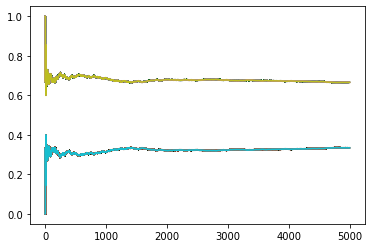

In [77]:
## Monty Hall Monte-Carlo Simulation

doors = ["G", "G", "C"]

switch_wins = []
stick_wins = []

def monte_carlo_MH(n=1000):
  switch = 0
  stick = 0

  for i in range(n):

    random.shuffle(doors)

    ## Pick one door at random
    pick_door = random.randrange(3)

    ## Once contestant picks a door, the host reveals the door with a goat(G)
    ## 

    if doors[pick_door] == "C":
      ## Picked winning door, will be winning without switching
      stick += 1
    else:
      ## Picked door with goat, switch to other door
      switch += 1
      
    switch_wins.append(float(switch) / (i+1))
    stick_wins.append(float(stick) / (i+1))

    plt.plot(switch_wins, label="Switch")
    plt.plot(stick_wins, label="Stick")

monte_carlo_MH(5000)